In [1]:
import glob
import imageio.v2 as imageio
import re
import numpy as np
import umap.umap_ as umap
import matplotlib.pyplot as plt



# Define the path to the images
path = 'imgs/sandal_e*_a*.png'

# Get a list of all image file paths
image_files = glob.glob(path)

# Initialize lists to store image data and the corresponding elevation and azimuth values
images = []
elevations = []
azimuths = []

# Regular expression to extract elevation and azimuth from file names
pattern = re.compile(r'sandal_e(\d+)_a(\d+).png')

# Loop over all image files and extract data
for file in image_files:
    # Read the image
    img = imageio.imread(file)
    images.append(img)
    
    # Extract elevation and azimuth from the file name
    match = pattern.search(file)
    if match:
        elevations.append(int(match.group(1)))
        azimuths.append(int(match.group(2)))

# Convert lists to numpy arrays for easier handling
images = np.array(images)
elevations = np.array(elevations)
azimuths = np.array(azimuths)

# Get the ranges of elevation and azimuth
elevation_range = (elevations.min(), elevations.max())
azimuth_range = (azimuths.min(), azimuths.max())

# Output the ranges
print(f"Elevation range: {elevation_range}")
print(f"Azimuth range: {azimuth_range}")


c:\Users\Dell XPS 15 9570\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Elevation range: (20, 59)
Azimuth range: (0, 87)


In [2]:
# Flatten the images for UMAP
n_samples, height, width = images.shape
flat_images = images.reshape(n_samples, height * width)

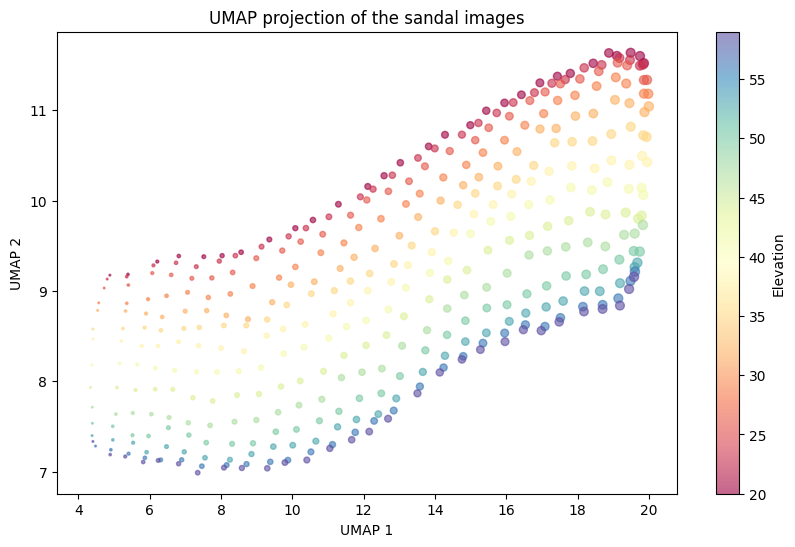

In [3]:
# Perform UMAP
reducer = umap.UMAP(n_components=2)
embedding = reducer.fit_transform(flat_images)

# Plot the UMAP embedding, color by elevation and size by azimuth
plt.figure(figsize=(10, 6))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=elevations, cmap='Spectral', s=azimuths/2, alpha=0.6)
plt.colorbar(scatter, label='Elevation')
plt.title('UMAP projection of the sandal images')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

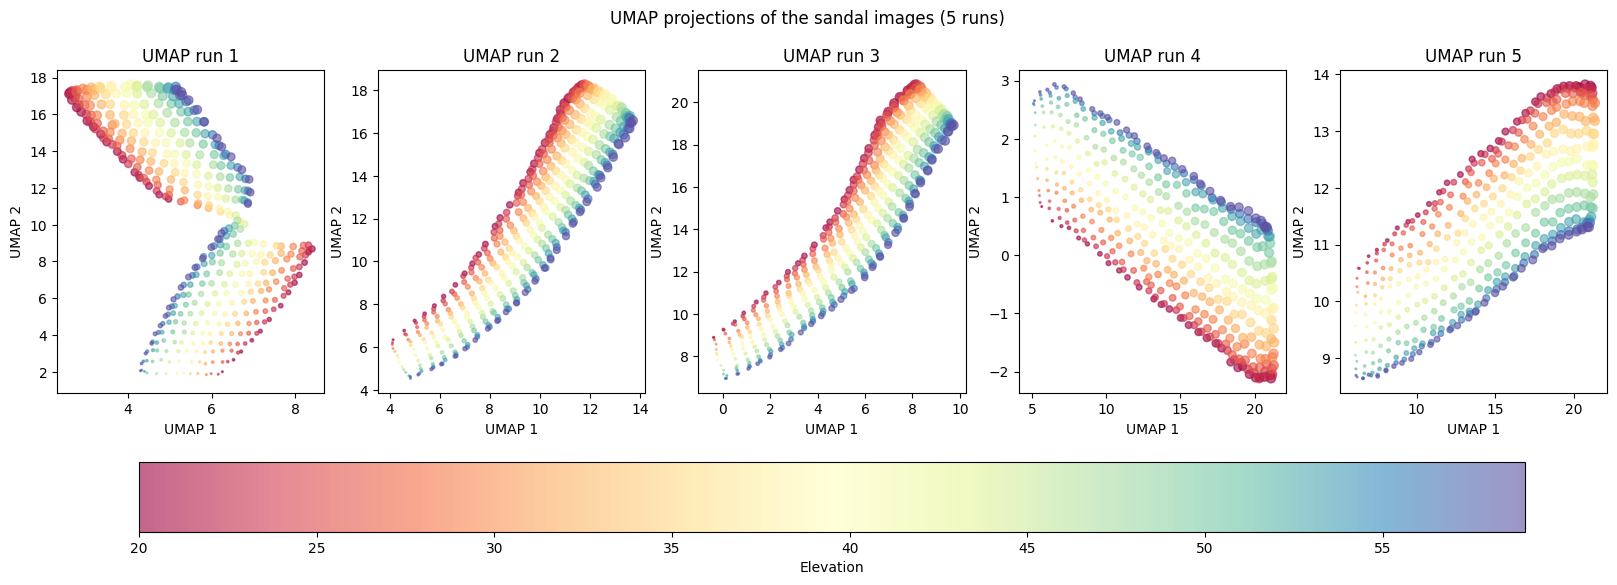

In [4]:
# Perform UMAP multiple times and plot the embeddings
num_runs = 5
fig, axes = plt.subplots(1, num_runs, figsize=(20, 6))

for i in range(num_runs):
    reducer = umap.UMAP(n_components=2)
    embedding = reducer.fit_transform(flat_images)
    
    scatter = axes[i].scatter(embedding[:, 0], embedding[:, 1], c=elevations, cmap='Spectral', s=azimuths/2, alpha=0.6)
    axes[i].set_title(f'UMAP run {i + 1}')
    axes[i].set_xlabel('UMAP 1')
    axes[i].set_ylabel('UMAP 2')

fig.colorbar(scatter, ax=axes, label='Elevation', orientation='horizontal')
plt.suptitle('UMAP projections of the sandal images (5 runs)')
plt.show()

Observed Differences

1. **Consistent Clustering**: Despite the stochastic nature of UMAP, the general clustering of points should remain consistent across runs. Clusters representing similar elevation and azimuth angles should appear in similar regions in each plot.

2. **Variation in Exact Positions**: While the overall structure is consistent, the exact positions of individual points will vary between runs. This is due to the inherent randomness in the optimization process used by UMAP.

3. **Global Layout**: The global layout (how clusters are positioned relative to each other) might slightly differ, but major features like prominent clusters or gradients should remain recognizable.

4. **Stability of Structure**: By running UMAP multiple times, we can observe how stable the identified structure is. If the plots consistently show similar structures, it indicates that UMAP is capturing meaningful patterns in the data.

5. **Impact of Blurring**: If you apply the blurring as suggested in the next bullet point, you might notice that the embeddings become more stable. This stability is because blurring reduces high-frequency noise, making the Euclidean distance metric more robust for UMAP.

Elevation range: (20, 59)
Azimuth range: (0, 87)


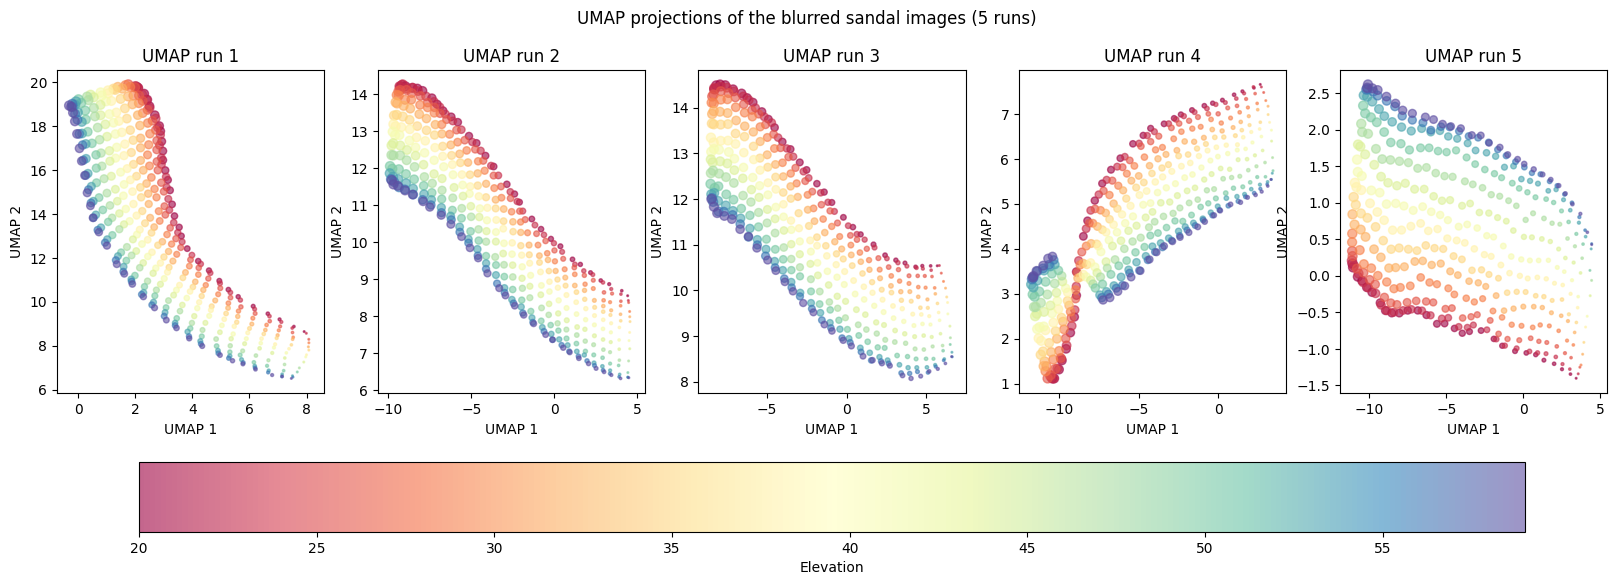

In [6]:

# (This last bullet point is purely voluntary and not part of the problem sheet grading.)


import glob
import imageio.v2 as imageio  # Avoiding the deprecation warning
import re
import numpy as np
import scipy.signal
import umap.umap_ as umap
import matplotlib.pyplot as plt

# Define the path to the images
path = 'imgs/sandal_e*_a*.png'

# Get a list of all image file paths
image_files = glob.glob(path)

# Initialize lists to store image data and the corresponding elevation and azimuth values
images = []
elevations = []
azimuths = []

# Regular expression to extract elevation and azimuth from file names
pattern = re.compile(r'sandal_e(\d+)_a(\d+).png')

# Loop over all image files and extract data
for file in image_files:
    # Read the image
    img = imageio.imread(file)
    images.append(img)
    
    # Extract elevation and azimuth from the file name
    match = pattern.search(file)
    if match:
        elevations.append(int(match.group(1)))
        azimuths.append(int(match.group(2)))

# Convert lists to numpy arrays for easier handling
images = np.array(images)
elevations = np.array(elevations)
azimuths = np.array(azimuths)

# Get the ranges of elevation and azimuth
elevation_range = (elevations.min(), elevations.max())
azimuth_range = (azimuths.min(), azimuths.max())

print(f"Elevation range: {elevation_range}")
print(f"Azimuth range: {azimuth_range}")

# Define the blur kernel
kernel = np.array([
    [1/16, 1/8, 1/16],
    [1/8, 1/4, 1/8],
    [1/16, 1/8, 1/16]
])

# Apply the blur kernel to each image
blurred_images = []
for img in images:
    blurred_img = scipy.signal.convolve2d(img, kernel, mode='valid')
    blurred_images.append(blurred_img)

blurred_images = np.array(blurred_images)

# Flatten the blurred images for UMAP
n_samples, height, width = blurred_images.shape
flat_blurred_images = blurred_images.reshape(n_samples, height * width)

# Perform UMAP multiple times and plot the embeddings
num_runs = 5
fig, axes = plt.subplots(1, num_runs, figsize=(20, 6))

for i in range(num_runs):
    reducer = umap.UMAP(n_components=2)
    embedding = reducer.fit_transform(flat_blurred_images)
    
    scatter = axes[i].scatter(embedding[:, 0], embedding[:, 1], c=elevations, cmap='Spectral', s=azimuths/2, alpha=0.6)
    axes[i].set_title(f'UMAP run {i + 1}')
    axes[i].set_xlabel('UMAP 1')
    axes[i].set_ylabel('UMAP 2')

fig.colorbar(scatter, ax=axes, label='Elevation', orientation='horizontal')
plt.suptitle('UMAP projections of the blurred sandal images (5 runs)')
plt.show()
